In [12]:
! wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet"
! wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet"

--2023-05-16 09:08:00--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.64.100.144, 18.64.100.213, 18.64.100.55, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.64.100.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1333519 (1,3M) [binary/octet-stream]
Saving to: ‘green_tripdata_2021-01.parquet’

green_tripdata_2021 100%[===================>]   1,27M  3,05MB/s    in 0,4s    

2023-05-16 09:08:00 (3,05 MB/s) - ‘green_tripdata_2021-01.parquet’ saved [1333519/1333519]

--2023-05-16 09:08:01--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.64.100.144, 18.64.100.213, 18.64.100.55, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.64.100.144|:443... connected.
HTTP request sent,

In [4]:
import pandas as pd
import numpy as np

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [103]:
df = pd.read_parquet("./data/green_tripdata_2021-01.parquet")

In [104]:
#!pip install pyarrow

In [105]:
#!pip install fastparquet

In [64]:
df = pd.read_parquet("./data/green_tripdata_2021-01.parquet")

In [106]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [11]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [107]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [108]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [109]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0.066667


In [110]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [137]:
((df.duration >= 1) & (df.duration <= 60)).mean()

1.0

In [136]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [135]:
df.trip_distance.describe(percentiles=[0.95,0.98,0.99])

count     73908.00000
mean         42.04772
std        1958.08235
min           0.00000
50%           2.60000
95%          15.36000
98%          19.71000
99%          23.13000
max      244152.01000
Name: trip_distance, dtype: float64

In [138]:
((df.trip_distance >= 0) & (df.trip_distance <= 24)).mean()

0.9920576933484873

In [139]:
df = df[(df.trip_distance >= 0) & (df.trip_distance <= 24)]

/var/folders/_t/600zc5h933xct15bshtzzvsr0000gn/T/ipykernel_9682/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

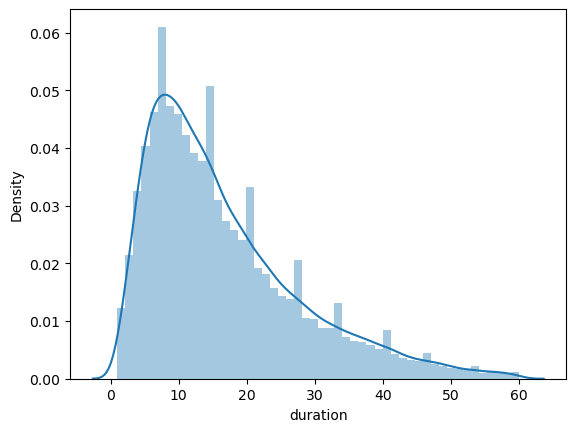

In [140]:
sns.distplot(df.duration)

In [141]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [142]:
df[categorical].isna().sum()

PULocationID    0
DOLocationID    0
dtype: int64

In [143]:
df[numerical].isna().sum()

trip_distance    0
dtype: int64

In [116]:
df[categorical] = df[categorical].astype(str)

In [144]:
df[numerical].describe()

,trip_distance
count,73321.000000
mean,4.288639
std,4.454890
min,0.000000
25%,1.330000
50%,2.580000
75%,5.560000
max,24.000000


In [145]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [146]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [147]:
X_train

<73321x504 sparse matrix of type '<class 'numpy.float64'>'
	with 219963 stored elements in Compressed Sparse Row format>

In [148]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [158]:
target = 'duration'
y_train = df[target].values

In [159]:
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [160]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [161]:
y_pred = lr.predict(X_train)

/var/folders/_t/600zc5h933xct15bshtzzvsr0000gn/T/ipykernel_9682/2414707756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/_t/600zc5h933xct15bshtzzvsr0000gn/T/ipykernel_9682/2414707756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

<function matplotlib.pyplot.legend(*args, **kwargs)>

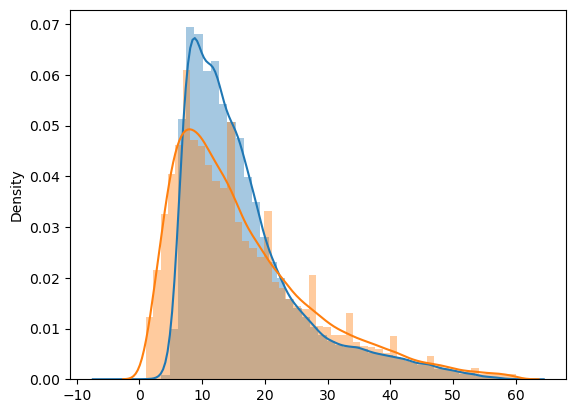

In [162]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend   

In [163]:
mean_squared_error(y_train, y_pred, squared=False)

6.268302075140822

/var/folders/_t/600zc5h933xct15bshtzzvsr0000gn/T/ipykernel_9682/1930670664.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/_t/600zc5h933xct15bshtzzvsr0000gn/T/ipykernel_9682/1930670664.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

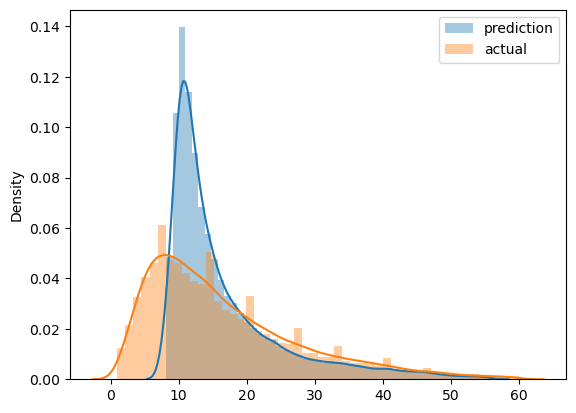

In [176]:
# Lasso Regression test
ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_train)

sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

mean_squared_error(y_train, y_pred, squared=False)

plt.legend()

In [178]:
# Create a function to read data and prepare everything
def read_dataframe(filename):
    # Read Data
    df = pd.read_parquet(filename)
    
    # Create new duration field in minutes
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    # Select the data which belongs to 98%/99% percentile
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    df = df[(df.trip_distance >= 0) & (df.trip_distance <= 24)]
    
    # Define Categorical
    categorical = ['PULocationID','DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [185]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [180]:
len(df_train), len(df_val)

(73321, 61542)

In [181]:
dv = DictVectorizer()
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

# Create train dictonary and vectorize it
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Create validation dictonary and vectorize it
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [182]:
# Define target
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [184]:
#Train the model and predict
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

# Look into 
mean_squared_error(y_val, y_pred, squared=False)

7.189782739530067

In [186]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [188]:
dv = DictVectorizer()
categorical = ['PU_DO']
numerical = ['trip_distance']

# Create train dictonary and vectorize it
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Create validation dictonary and vectorize it
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [189]:
#Train the model and predict
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

# Look into 
mean_squared_error(y_val, y_pred, squared=False)

6.6989660849932005

/var/folders/_t/600zc5h933xct15bshtzzvsr0000gn/T/ipykernel_9682/2470936088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/_t/600zc5h933xct15bshtzzvsr0000gn/T/ipykernel_9682/2470936088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

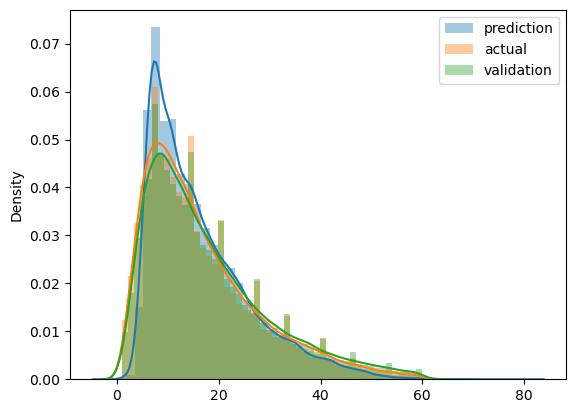

In [190]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
sns.distplot(y_val, label='validation')

plt.legend()